In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Дискретное распределение (Версия для Python 3)

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [3]:
sample = np.random.choice([1,2,3,4,5,6], 100)
sample

array([2, 4, 6, 5, 2, 5, 1, 4, 2, 1, 4, 5, 4, 6, 6, 5, 5, 6, 6, 4, 6, 6,
       4, 2, 4, 3, 2, 6, 2, 2, 4, 1, 2, 4, 1, 6, 5, 3, 2, 1, 3, 1, 2, 2,
       4, 1, 3, 4, 4, 6, 6, 3, 2, 3, 1, 1, 1, 5, 5, 4, 1, 1, 2, 5, 4, 5,
       3, 5, 6, 4, 3, 6, 4, 3, 6, 2, 3, 4, 6, 1, 5, 3, 1, 4, 4, 6, 3, 2,
       4, 2, 3, 5, 4, 6, 4, 6, 5, 1, 4, 5])

Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [7]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter(sample)

print("Число выпадений каждой из сторон:")    
print(c)
print (c.items())
c.items()

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100.0 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({4: 23, 6: 18, 2: 16, 5: 15, 1: 15, 3: 13})
dict_items([(2, 16), (4, 23), (6, 18), (5, 15), (1, 15), (3, 13)])
Вероятности выпадений каждой из сторон:
{2: 0.16, 4: 0.23, 6: 0.18, 5: 0.15, 1: 0.15, 3: 0.13}


Это и есть оценка функции вероятности дискретного распределения.

# Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):

In [11]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
print(norm_rv)
sample

array([-1.63696376, -0.26522413,  0.58236393,  0.15680579,  0.03498646,
       -0.51383182, -0.59496796,  0.02701283, -0.80219674,  0.18600206,
        0.90552401,  1.0953342 ,  0.0575968 , -0.28440728, -0.26822695,
       -0.67438959, -0.26355929,  0.47557404, -1.27816635,  0.31824438,
       -0.81771927, -0.16172855,  0.28861812, -0.77608609,  0.93350613,
       -1.54722632, -0.38340622,  0.87220645,  1.04120198, -1.17467524,
       -0.69861438, -0.31111781,  0.15277016, -1.08240108, -0.60369521,
       -0.39661461, -0.16993167, -0.11395171, -0.32551146, -0.06927766,
        0.1771388 , -0.47493349,  0.16611971, -0.03666738, -0.08851788,
       -1.59229676, -1.53693394, -0.43128828,  1.09213728, -2.01112369,
       -0.24278065,  0.01028791,  1.19792988, -0.83593809,  0.34463116,
       -0.56194245, -1.94315366, -0.55728813, -1.06460101, -1.10441441,
        0.52406778, -0.49908692, -1.79117917, -0.25756406,  1.90444311,
        1.46509775,  0.21581488,  0.62934194, -0.5488651 ,  1.12

Эмпирическая функция распределения для полученной выборки:

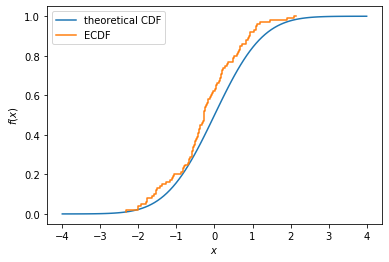

In [17]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

print (ecdf)

Гистограмма выборки:

Text(0.5, 0, '$x$')

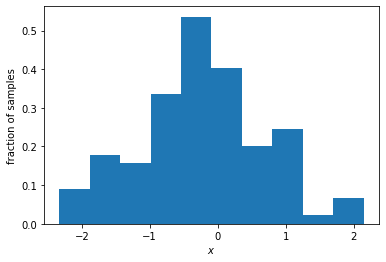

In [20]:
plt.hist(sample, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Попробуем задавать число карманов гистограммы вручную:

Text(0.5, 0, '$x$')

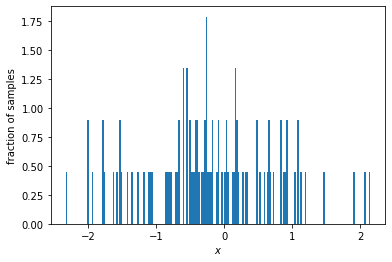

In [26]:
plt.hist(sample, bins=200, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5,0,'$x$')

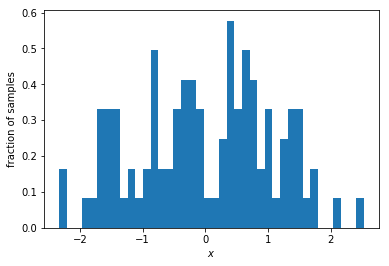

In [14]:
plt.hist(sample, bins=40, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

[1.33830226e-04 1.84295302e-04 2.52138056e-04 3.42709873e-04
 4.62784614e-04 6.20862299e-04 8.27514755e-04 1.09577221e-03
 1.44154732e-03 1.88408981e-03 2.44646147e-03 3.15601632e-03
 4.04486639e-03 5.15030799e-03 6.51517825e-03 8.18810653e-03
 1.02236211e-02 1.26820683e-02 1.56292995e-02 1.91360817e-02
 2.32771927e-02 2.81301641e-02 3.37736510e-02 4.02854146e-02
 4.77399263e-02 5.62056185e-02 6.57418315e-02 7.63955298e-02
 8.81978860e-02 1.01160853e-01 1.15273870e-01 1.30500851e-01
 1.46777638e-01 1.64010075e-01 1.82072870e-01 2.00809396e-01
 2.20032535e-01 2.39526659e-01 2.59050772e-01 2.78342808e-01
 2.97125003e-01 3.15110210e-01 3.32008980e-01 3.47537175e-01
 3.61423830e-01 3.73418974e-01 3.83301094e-01 3.90883931e-01
 3.96022313e-01 3.98616779e-01 3.98616779e-01 3.96022313e-01
 3.90883931e-01 3.83301094e-01 3.73418974e-01 3.61423830e-01
 3.47537175e-01 3.32008980e-01 3.15110210e-01 2.97125003e-01
 2.78342808e-01 2.59050772e-01 2.39526659e-01 2.20032535e-01
 2.00809396e-01 1.820728

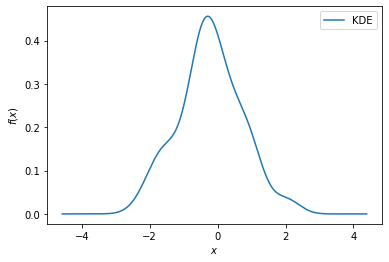

In [36]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
#plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

print (pdf)